In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [26]:
dataset_dir = "Ass6\caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [27]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [28]:
# Load VGG16 without top layers
weights_path = "Ass6/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
#http://localhost:8888/edit/Ass6/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [29]:
for layer in base_model.layers:
   layer.trainable = False

In [30]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 80s 3s/step - loss: 3.8701 - accuracy: 0.2355 - val_loss: 3.3060 - val_accuracy: 0.3090
Epoch 2/10
32/32 [==============================] - 80s 3s/step - loss: 2.9581 - accuracy: 0.3645 - val_loss: 2.8996 - val_accuracy: 0.3805
Epoch 3/10
32/32 [==============================] - 80s 3s/step - loss: 2.4669 - accuracy: 0.4745 - val_loss: 2.5997 - val_accuracy: 0.4550
Epoch 4/10
32/32 [==============================] - 80s 3s/step - loss: 2.1102 - accuracy: 0.5455 - val_loss: 2.3787 - val_accuracy: 0.4840
Epoch 5/10
32/32 [==============================] - 80s 3s/step - loss: 1.8001 - accuracy: 0.6120 - val_loss: 2.2331 - val_accuracy: 0.5120
Epoch 6/10
32/32 [==============================] - 79s 2s/step - loss: 1.5682 - accuracy: 0.6650 - val_loss: 2.1222 - val_accuracy: 0.5285
Epoch 7/10
32/32 [==============================] - 80s 3s/step - loss: 1.3764 - accuracy: 0.7055 - val_loss: 2.0189 - val_accuracy: 0.5415
Epoch 8/10
32/32 [==

In [32]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 84s 3s/step - loss: 3.1219 - accuracy: 0.3570 - val_loss: 2.3294 - val_accuracy: 0.4915
Epoch 2/10
32/32 [==============================] - 84s 3s/step - loss: 1.8086 - accuracy: 0.5725 - val_loss: 1.9260 - val_accuracy: 0.5585
Epoch 3/10
32/32 [==============================] - 84s 3s/step - loss: 1.1681 - accuracy: 0.6985 - val_loss: 1.7034 - val_accuracy: 0.6065
Epoch 4/10
32/32 [==============================] - 84s 3s/step - loss: 0.7554 - accuracy: 0.7980 - val_loss: 1.6063 - val_accuracy: 0.6205
Epoch 5/10
32/32 [==============================] - 85s 3s/step - loss: 0.4591 - accuracy: 0.8835 - val_loss: 1.6059 - val_accuracy: 0.6335
Epoch 6/10
32/32 [==============================] - 85s 3s/step - loss: 0.3003 - accuracy: 0.9210 - val_loss: 1.5881 - val_accuracy: 0.6385
Epoch 7/10
32/32 [==============================] - 85s 3s/step - loss: 0.1930 - accuracy: 0.9510 - val_loss: 1.6217 - val_accuracy: 0.6405
Epoch 8/10
32/32 [==

In [33]:
import matplotlib.pyplot as plt


In [34]:
predicted_value = model.predict(x_test)

In [35]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  brain
Actual:  brain


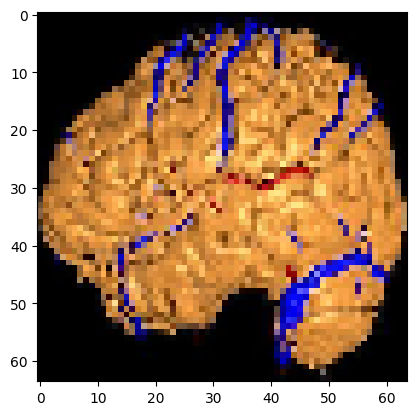

In [37]:
n = 887
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])